# Density-Based Spatial Clustering of  Applications with Noise (DBSCAN)  

### This Notebook is a sort of tutorial.
* The aim is just to show how to build the simplest DBSCAN model. As examples, I show how to employ DBSCAN model for two very different data sets including the Iris data set. 


Contact: Amir Rezaeian  <font color='blue'> (Email: Rezaeian9@gmail.com)</font>

# What is the DBSCAN?  
# It is an unsupervised learning model for clustering or classification. 
* It can very well handle clusters of complicated shape in the presence of noise. 
* It relies on a density-based notion of cluster.



## <font color='blue'>  Basic idea:</font>
* Group together points in <font color='brown'> high-density</font>
* Mark as outliers ------> points lie alone in  <font color='brown'>low-density </font> regions

### For details of the model see: [DBSCAN at Wikipedia](https://en.wikipedia.org/wiki/DBSCAN)


# Import packages

In [7]:
# Importing needed packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## import data
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn import datasets

## import DBSCAN model
from sklearn.cluster import DBSCAN
from sklearn import metrics


plt.style.use('ggplot')
%matplotlib inline

# Example 1: sklearn.datasets.make_moons
### A simple toy dataset to visualize clustering and classification algorithms

In [8]:
# import the data from sklearn.datasets.make_moons
X_1, labels_true = make_moons(n_samples=200, noise=0.1, random_state=19)
print(X_1[:10,])

[[ 0.28171457  0.91044406]
 [ 0.8389241  -0.53005338]
 [ 0.40915474  0.80944352]
 [-0.98415213  0.13142155]
 [ 1.15919021  0.4910425 ]
 [-0.96703486  0.0981273 ]
 [ 0.91739138 -0.2334927 ]
 [ 0.97827508  0.50147001]
 [ 1.85907097  0.33087146]
 [ 1.28971276 -0.36416076]]


# Train the DBSCAN model 

In [22]:
model_1 = DBSCAN(eps=0.25, min_samples=12).fit(X_1)

print(model) # model set-ups and parameters

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
    min_samples=12, n_jobs=1, p=None)


### Note that the DBSCAN model requires two parameters, eps and min_samples which should be given from outset. 

* eps is a radius which defines neighborhood for a data point.  
* min_samples (or minPts) is the minimum number of points required to form a dense region within a radius eps. 

In [23]:
## Another way to see parameters and definition of the DBSCAN model
model_1.get_params

<bound method BaseEstimator.get_params of DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
    min_samples=12, n_jobs=1, p=None)>

# Access the cluster labels and core points

In [24]:
labels_1=model_1.labels_
labels_1

array([ 0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,
        1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  1, -1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,
        0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,
        0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  1,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0])

In [25]:
# Alternative way to access the cluster labels (the same as above) 
model_1.fit_predict(X_1)

array([ 0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,
        1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  1, -1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,
        0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,
        0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  1,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0])

## Note that noises are labeled by -1. 

In [26]:
# find all core indices
model_1.core_sample_indices_

array([  0,   1,   2,   7,   9,  10,  12,  13,  14,  18,  20,  21,  22,
        23,  24,  26,  28,  29,  31,  32,  33,  34,  35,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  49,  50,  51,  55,  56,  57,
        58,  59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        73,  75,  76,  77,  78,  79,  81,  83,  84,  86,  87,  88,  89,
        91,  92,  93,  94,  96,  98, 101, 102, 104, 105, 106, 107, 108,
       109, 110, 112, 113, 114, 115, 117, 118, 119, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 134, 136, 137, 138, 139, 140,
       142, 143, 144, 145, 147, 148, 149, 150, 154, 155, 157, 158, 159,
       160, 162, 163, 164, 165, 166, 170, 172, 173, 175, 177, 180, 182,
       183, 184, 187, 188, 189, 190, 191, 195, 197])

In [27]:
# Copy of each core sample found by training
XX= model_1.components_
XX

array([[  2.81714569e-01,   9.10444056e-01],
       [  8.38924105e-01,  -5.30053378e-01],
       [  4.09154736e-01,   8.09443517e-01],
       [  9.78275081e-01,   5.01470015e-01],
       [  1.28971276e+00,  -3.64160764e-01],
       [  5.84428413e-01,   7.67799476e-01],
       [  7.94417589e-01,   6.12926580e-01],
       [  1.79695065e+00,  -2.93018722e-02],
       [  2.32147899e-01,   9.24300964e-01],
       [  1.11837392e+00,  -4.01525312e-01],
       [  1.49243452e-01,  -1.28066249e-01],
       [ -3.43639867e-01,   8.37080031e-01],
       [ -3.46496873e-01,   7.71662626e-01],
       [  1.10554355e+00,  -3.66008783e-01],
       [  1.77313541e+00,   2.20647050e-01],
       [ -2.33630869e-01,   1.01740159e+00],
       [  7.22840616e-01,  -3.78990619e-01],
       [  1.06124107e+00,  -4.22074761e-01],
       [ -3.39269973e-01,   9.07231980e-01],
       [  4.87196179e-01,   9.17613431e-01],
       [  5.07742972e-01,   6.91930633e-01],
       [  6.46502886e-01,   7.49997777e-01],
       [  

# Plot the clusters in feature space

/Users/Amir/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


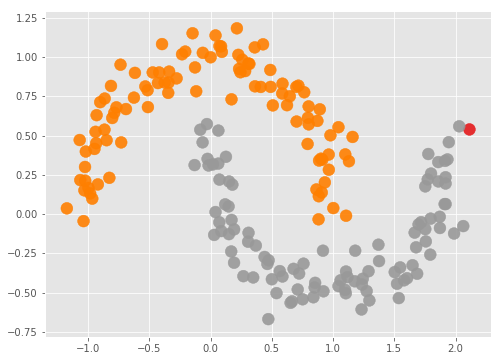

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_1[:, 0], X_1[:, 1], c=model_1.labels_, s=140, alpha=0.9, cmap=plt.cm.Set1)
#ax.scatter(XX[:, 0], XX[:, 1], s=50, alpha=0.9, c="b") # show the cores points

fig.show()


##  Number of clusters 

In [29]:
# Number of clusters in labels, ignoring noise points
n_clusters_ = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 2


##  Number of noise points 

In [30]:
print("Number of Noise Points: ",sum(model_1.labels_==-1)," (",len(model_1.labels_),")",sep='')

Number of Noise Points: 1 (200)


## <font color='red'>Homework</font>: Apply the k-means clustering algorithm to the above dataset. 
### You will see that for this particular dataset DBSCAN model outperforms the k-means models. 



# Example 2: 

###  In the second example, I will apply the DBSCAN on Iris data set to find the clustering of flowers. For more details about Iris data sets see: [Iris data set at wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [32]:
# Import the Iris dataset from scikit-learn
iris = datasets.load_iris()


In [33]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [34]:
X = iris.data    
y = iris.target
target_names = iris.target_names

In [35]:
# shape of data
X.shape

(150, 4)

In [36]:
# names of target
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [37]:
# to convert the data as pandas table
df = pd.DataFrame(X, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Visual exploratory data analysis 

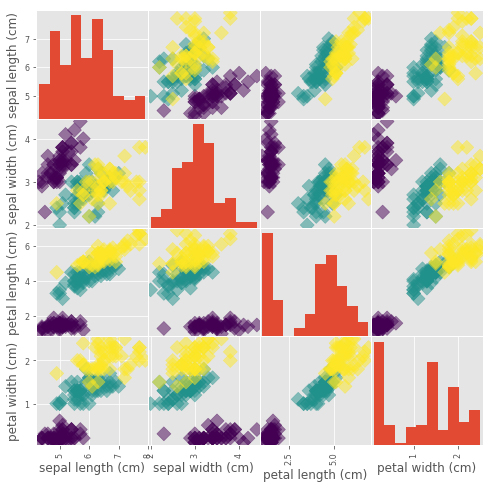

In [38]:
pd.scatter_matrix(df, c = y, figsize = [8, 8], s=100, marker='D')
plt.show()

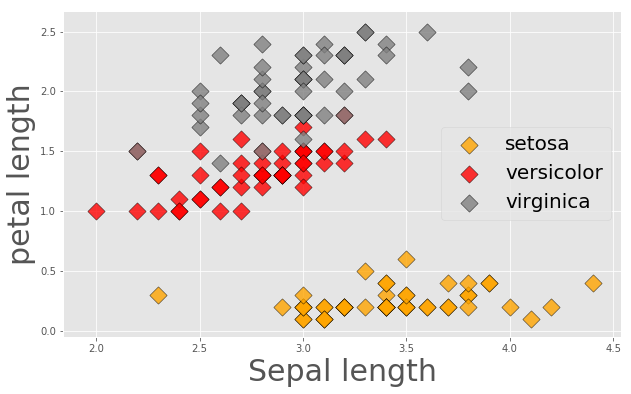

In [39]:
## Show only two features 'Sepal length' and 'petal length' for different types of flowers (target labels)
plt.figure(2, figsize=(10, 6))
colors = ['orange', 'red', 'gray']


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 1], X[y == i, 3], color=color, alpha=.8, 
                label=target_name, s=150, cmap=plt.cm.Set1, edgecolor='k',marker='D')
plt.legend(loc='best', shadow=False, scatterpoints=1,fontsize=20)
plt.xlabel('Sepal length', fontsize=30) 
plt.ylabel('petal length', fontsize=30) 
#plt.legend(fontsize=30)
plt.show()

# Train the model

In [40]:
model = DBSCAN(eps=0.8, min_samples=6).fit(X)
labels=model.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## Number of clusters 

In [41]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_ 

2

## Number of noise points 

In [42]:
#
print("Number of Noise Points: ",sum(model.labels_==-1)," (",len(model.labels_),")",sep='')

Number of Noise Points: 2 (150)


In [47]:
# alternative way to count number of different labels (-1, 0, 1): 
count= Counter(model.labels_)
count

Counter({-1: 2, 0: 50, 1: 98})

# Plot the clusters in feature space

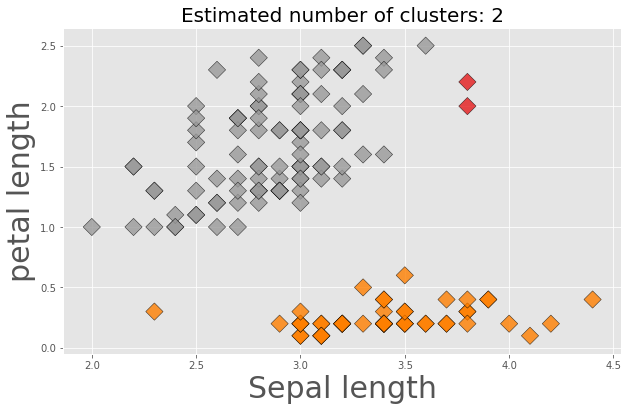

In [48]:
plt.figure(2, figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 3], c=model.labels_, s=150,  cmap=plt.cm.Set1,alpha=.8, edgecolor='k',marker='D')
#plt.scatter(X[:, 1], X[:, 3], c=y, s=150, cmap=plt.cm.Set1, edgecolor='k', marker='D')   #target 
plt.xlabel('Sepal length', fontsize=30) 
plt.ylabel('petal length', fontsize=30) 
plt.title('Estimated number of clusters: %d' % n_clusters_, fontsize=20)
plt.show() 

## <font color='red'>Homework</font>: Can you find a good eps and min_samples to get exactly 3 clusters for Iris dataset?. 

# Finding number of clusters by varying eps

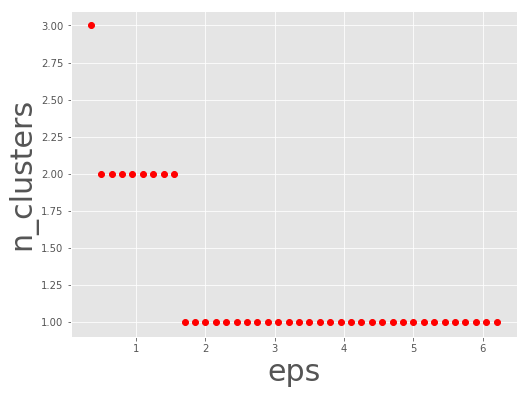

In [49]:
## Solution of homework (finding eps for a fixed min_samples=6)

eps=0.2
for i in range(40):
    eps +=0.15
    model = DBSCAN(eps, min_samples=6).fit(X)
    labels = model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    plt.figure(2, figsize=(8, 6))
    plt.plot(eps,  n_clusters_,'-o', c='red')
    plt.ylabel('n_clusters', fontsize=30)
    plt.xlabel('eps',fontsize=30)
plt.show()   

# Measuring model performance: <font color='blue'>*Completeness & homogeneity scores*</font>

In [50]:
model = DBSCAN(eps=0.8, min_samples=6).fit(X)
labels=model.labels_
labels_true = iris.target

print("Completeness: %0.2f" % metrics.completeness_score(labels_true, labels))
print("Homogeneity: %0.2f" % metrics.homogeneity_score(labels_true, labels))

Completeness: 0.92
Homogeneity: 0.59


* Perfect homogeneity score=1, perfect completeness score =1: your clustering matches your classes perfectly. 

* A clustering result satisfies <font color='red'>homogeneity</font> if all of its <font color='red'>clusters</font> contain only data points which are members of a <font color='red'>single class</font>. 

* A clustering result satisfies <font color='red'> completeness </font> if all the data points that are members of a given <font color='red'> class</font> are elements of the <font color='red'> same cluster</font>.

# Example for completeness & homogeneity scores

In [41]:
# Perfect labelings are complete and homogeneous:
print("Completeness: %0.1f" %  metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

Completeness: 1.0


In [42]:
# completeness: for a given class, are all its points placed in one cluster?
print("Completeness: %0.1f" %  metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))

Completeness: 1.0


In [44]:
# Homogeneity: for a given cluster, do all the points in it come from the same class?
print("Homogeneity: %0.1f" %  metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

Homogeneity: 0.0


# For more information on DBSCAN see:  
[scikit-learn: Demo of DBSCAN clustering algorithm](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)